In [1]:
import json
import pandas as pd
import numpy as np
import requests
from io import BytesIO
from PIL import Image
import textdistance
import time
from glob import glob
import os
import re

from preprocess import Preprocess

In [2]:
import warnings

# 경고메세지 끄기
warnings.filterwarnings(action='ignore')

# 데이터 경로 지정
base_bath = '2022-03-14/'  # 데이터 기본 경로 (필요시 변경)
best = glob(base_bath+'best*.json')
item = glob(base_bath+'item*.json')
products = glob(base_bath+'prod*.json')
category = glob(base_bath+'cate*.json')

# json => DataFrame 데이터 불러오기
print("데이터를 불러옵니다.")
st = time.time()
DATA = Preprocess(best, item, products, category)
print(f"데이터 전처리 시간 : {time.time()-st}초")

best_item_df, products_df_4, products_df_b = DATA.best_item, DATA.products_4, DATA.products_b
best_item_df.shape, products_df_4.shape, products_df_b.shape

데이터를 불러옵니다.
데이터 전처리 시간 : 3.716635227203369초


((10855, 39), (10322, 15), (105135, 15))

In [3]:
from tqdm import tqdm
from run import SEARCH_RECOMMEND

def check_all(df, base_path=None):
    item_name_list = df.drop_duplicates('name')['name'].tolist()
    
    result_list = []
    for prod in tqdm(item_name_list):
        search_engine = SEARCH_RECOMMEND(df, qval=None)
        prod_result = search_engine.search_product(prod, topn=10, algo='sorensen', save_image=False, verbose=False)
        result_list.append(prod_result)
    
    result = pd.DataFrame(result_list, columns=['id', 'name', 'project_ids', 'rec_names', 'rec_ids', 'rec_project_ids', 'rec_sim'])
    if base_path:
        if not os.path.exists(base_path):
            os.makedirs(base_path)
            
        result.to_csv(base_path+f'/{base_path}.csv')
    return result

In [4]:
result_4_df = check_all(products_df_4, base_path='result_4')

100%|███████████████████████████████████████| 2719/2719 [03:56<00:00, 11.51it/s]


In [5]:
result_b_df = check_all(products_df_b, base_path='result_b')

100%|███████████████████████████████████| 10763/10763 [1:16:47<00:00,  2.34it/s]


In [9]:
result_4_df

,id,name,project_ids,rec_names,rec_ids,rec_project_ids,rec_sim
0,XlaPAt1F04C5D4A758043D9,싱크대 상+하부장 세트 (싱크대) (화이트),"[X7SICxf1E93759C0BB446D8, Xp_QGx204178331804F4...","[Archisketch White Door PAX (White), Archisket...","[CF82998ED7D14147, BB619A8F938445AB, XhthJbJA7...","[[Xp_QGx204178331804F4460, X-BAWYA1E0AEA65123E...","[0.08629441624365486, 0.08306709265175716, 0.0..."
1,FE1DE8319CFA4CC6,Archisketch Kitchen Sink H W,"[X5OHQLDCAEC5296482E41A3, X2-MeDuB6AD4798A8174...","[허밍 라탄 라운지 체어(내추럴), 케인 소파 테이블 오크, Archisketch ...","[XZqqknh48A27812E39449DF, Xgzajo2FB29D2EA44184...","[[Xp5ef2h36404C46A92547A5], [Xp5ef2h36404C46A9...","[0.1278195488721805, 0.12734082397003743, 0.12..."
2,XVEdTVbB36B4290A8D74B4F,포 스태킹 쉘브 L 1X6 (샌드 베이지),[X94aj6O02A989C67F29445D],"[LC3 2-Seater Sofa White Leather & Chrome, Cas...","[X7jrBI_FD5171E0E7E14E4B, X7ixwaJ9D002DB10B0E4...","[[X94aj6O02A989C67F29445D], [X94aj6O02A989C67F...","[0.967741935483871, 0.9375, 0.8823529411764706..."
3,XoxY7Sk68DAEBBD7A7D4BFD,Verve Malibu Ross,"[X7Cl0gz1A369AD17E784941, X4gAc3x2E3368DD7A864...","[LC3 2-Seater Sofa White Leather & Chrome, 파이버...","[X7jrBI_FD5171E0E7E14E4B, XmsPo7HC315AC94EFA04...","[[X94aj6O02A989C67F29445D], [X94aj6O02A989C67F...","[0.8823529411764706, 0.8648648648648649, 0.857..."
4,Xhjjsyp24F553380D414A9A,Books 10 Set,"[X9O3JAoA616192C42C84C95, X7Cl0gz1A369AD17E784...","[전등 스위치, 화이트템플 잎차 30g, Cassina LC1 Leather, 에디...","[CFC00CF3DC084A52, XoxY7Su5452FC7EF30C4658, X7...","[[X9IWFJ0D5F5CFE1D76E4EEF, Xt4qm3U1179D0EE9900...","[0.33333333333333326, 0.24615384615384617, 0.2..."
...,...,...,...,...,...,...,...
2714,Xjuq0z7D2F7DB2432D045AE,접착식 웨인스코팅 셀프시공 c타입,"[Xq90EyH032BA2E56795471C, XqZGlY0E34722FCA1854...","[마블 베이스 캔들 스틱, Archisketch Living Rug, Q_pillo...","[Xl916Y_E111CB134B7D479F, 702877789CBF439C, Xd...","[[Xq90EyH032BA2E56795471C], [XqZGlY0E34722FCA1...","[0.9473684210526315, 0.5128205128205128, 0.5, ..."
2715,Xl916Y_E111CB134B7D479F,마블 베이스 캔들 스틱,[Xq90EyH032BA2E56795471C],"[접착식 웨인스코팅 셀프시공 c타입, Archisketch Kitchen Shelf...","[Xjuq0z7D2F7DB2432D045AE, 4ABBC08E68B54E7A, Xz...","[[Xq90EyH032BA2E56795471C, XqZGlY0E34722FCA185...","[0.9473684210526315, 0.4864864864864865, 0.486..."
2716,XigxR0s7AC9115F35B34210,임스체어 (블랙),[XqKIv7rAAF851FED2D84982],"[원형 테이블600 (화이트/크롬), 스테인레스 양념통 6P세트, 베이직 큰 캐비넷...","[XiRVNA2D708A49D40DE4F3C, XoTU3ZLE85BC61F7A1B4...","[[X3haAi7228A292446E946A6, XqKIv7rAAF851FED2D8...","[0.9302325581395349, 0.5, 0.5, 0.5, 0.5, 0.5, ..."
2717,XdHuXEk5C8C3DBA90D346F6,"End of Spring, Calm M (알루미늄-골드)",[Xq-AW4h66CBEA7EFD794BEC],"[데이지 오크 소파 3인 (실크그레이), 데이지 타원 테이블 1800 (오크), L...","[XrMj64yCB29D94D7E32414D, XcjiR5qAF13E39F8DA84...","[[XsMLpKX5A558DBEF76D44A2], [XsMLpKX5A558DBEF7...","[0.5, 0.4878048780487805, 0.4878048780487805, ..."


In [17]:
sim_mean_avg_4 = result_4_df.rec_sim.apply(lambda x: np.mean(x)).mean()
print(f"enterprise_id [421B6D0E746C4E6D] 평균 유사도 : {round(sim_mean_avg_4, 2)}")

enterprise_id [421B6D0E746C4E6D] 평균 유사도 : 0.62


In [18]:
result_b_df

,id,name,project_ids,rec_names,rec_ids,rec_project_ids,rec_sim
0,Xr78icj4A312D98A68C4F0E,[스탠드형] 무풍갤러리에어컨 AF17TX773FZS 17평형 기본설치비(그레이),"[XyW7R_LE817829513EE4F54, X6Hl791985F57EA69D74...","[D2178B. 뷰티레스트 스위트. 슈퍼싱글 침대 (라이트오크), 라운드 테이블 3...","[XjDwfV8996E73AED80E4525, XrTVB0IAA01B3A5EFA84...","[[X6eMi9vBF9F09546EFE415A, X4vj6OHF1F0F6E1AB6F...","[0.35443037974683544, 0.30952380952380953, 0.3..."
1,XjDwfV8996E73AED80E4525,D2178B. 뷰티레스트 스위트. 슈퍼싱글 침대 (라이트오크),"[X6eMi9vBF9F09546EFE415A, X4vj6OHF1F0F6E1AB6F4...","[라운드 테이블 3colors (화이트-화이트), DSBC082S 800폭 2단 수...","[XrTVB0IAA01B3A5EFA84A83, XxzIVRW106F03FC91BA4...","[[X5OHQLDCAEC5296482E41A3, X8VcqiB3F55D2378E68...","[0.5909090909090909, 0.5384615384615384, 0.518..."
2,Xr78id08D1C38D7AD0D4D47,LED 뉴플랜 면조명 방등 50W (주광색),"[X2-MeDuB6AD4798A8174EF0, XxZrWjTBA22CAA9F6EA4...","[암막방염 블라인드 롤스크린 (쥬드-아이보리), 버플리 원목 스마트 협탁 (네이비)...","[782750C75C2E49CA, XxzI_Y4E405ADB387FA4FD0, XY...","[[X63vp3wB1C705DFFFFC44A9, X3yWN7925908D5FFFC0...","[0.11926605504587151, 0.11707317073170731, 0.1..."
3,XW7kCXB76493DC124DA4086,인테리어 식물 남천 중형_토분 (스팡 기본형) (화이트),"[X8GW1JKCE0E36F8F7534315, X8gwUKf0036C3F8EE4F4...","[루씨에어 실링팬 레이더 (크롬티크), PREMIUM 맞춤 우드 블라인드 에스프레소...","[XvJwdJyAB81D61717CA4F58, E1632324621148B0, Xx...","[[X7E11Nw23EAA66A8A804615, X3BGEnY8202DF385739...","[0.12080536912751683, 0.11228070175438598, 0.1..."
4,XXf3WaG2976267E48E740A7,집순이 슬리브 옥스포드 삼각등쿠션 6color 네이비,"[XdxLcOrA5B22BB3C6914BE3, Xw5FS3400C8ABE146AD4...","[모듈 가구 1x2 사이드테이블 (네이비), Vanilla Spring no.05,...","[XvJwdJi2D7859C2C34F40B6, XkczKZr8E2428D00B0D4...","[[X4vj6OHF1F0F6E1AB6F4B03, X9VYwJu05709020A690...","[0.5066666666666667, 0.5066666666666667, 0.463..."
...,...,...,...,...,...,...,...
10758,5160075C05A8489E,누벨르 벙커 침대 블랙,[Xq44kkm4F86420AAEEA4145],"[엑소 스틸 H형 책상세트 1000 (아카시아-블랙), 포유 패브릭 2인 소파의자 ...","[XgVtjoHFF8272D233E449AA, XdrRkbk551C178BF3884...","[[Xq44kkm4F86420AAEEA4145, XxPiZ-5CBE405753051...","[0.9047619047619048, 0.8636363636363636, 0.5, ..."
10759,XfTXNkh01059AC5CD2A43B7,이든 1200 철제 책상 4colors(화이트오크),[XrIq7QQC2EEAC36DBEC4877],"[큐브쿠션 에펠체어 4colors (아이보리), 국내생산 책상 학생/사무용 컴퓨터의...","[XdC91jI17C2A8001ECB4AC8, XgRQdKMA354E8A133784...","[[XrIq7QQC2EEAC36DBEC4877], [X5J-O826593ACA079...","[0.8333333333333334, 0.47619047619047616, 0.47..."
10760,XdC91jI17C2A8001ECB4AC8,큐브쿠션 에펠체어 4colors (아이보리),[XrIq7QQC2EEAC36DBEC4877],"[이든 1200 철제 책상 4colors(화이트오크), 아델라이드 크리즈 커튼 멜빵...","[XfTXNkh01059AC5CD2A43B7, X22k1GW7BA3A4DFAB674...","[[XrIq7QQC2EEAC36DBEC4877], [X99vWrx02029BAAFD...","[0.8108108108108109, 0.5, 0.5, 0.5, 0.5, 0.5, ..."
10761,XfdyLMiAD3131B5344F49A6,시엘바체어 아일랜드식탁 홈바 (베이지),[XrDdrlEC561A472295A4E06],"[(-)올리브 1200 선반형 홈바 아일랜드 식탁 (화이트우측형+멀바우), 그랑데 ...","[29078FC80DBF4FC6, X1-TGy80B6843C8A3DD4E8F, Xs...","[[XrnQTU2D2BD10B8F73340F9], [X85FuQu5C992B44AD...","[0.4782608695652174, 0.47619047619047616, 0.47..."


In [19]:
sim_mean_avg_b = result_b_df.rec_sim.apply(lambda x: np.mean(x)).mean()
print(f"enterprise_id [B57D4F97C0E44A11] 평균 유사도 : {round(sim_mean_avg_b, 2)}")

enterprise_id [B57D4F97C0E44A11] 평균 유사도 : 0.5


## 아이템 개별 추천 결과 테스트

In [7]:
def show_result_and_image(df, prod, result_df, topn):
    # show result image
    print(f'사용자가 선택한 아이템 : {prod}')
    try:
        prod_res = requests.get(df[df['name'] == prod]['images'].values[0][0])
        display(Image.open(BytesIO(prod_res.content)))
    except:
        print('이미지 없음\n')
        print()

    print("="*80)
    print(f"추천 아이템 Top{topn}")
    print("="*80)

    i = 1
    for name, img_url in result_df[['name', 'images']].values:
        print(f"추천 {i}순위 : {name}")
        try:
            res = requests.get(img_url[0])
            img = Image.open(BytesIO(res.content))
            display(img)
        except:
            print('이미지 없음\n')
        print("-"*60)
        i += 1
        
def run_search(ent_id, prod_name):
    """
    ent_id : 0 -> '421B6D0E746C4E6D', 1 -> 'B57D4F97C0E44A11'
    prod_name : 검색할 상품 이름
    """
    data = [products_df_4, products_df_b]
    topn = [10, 10]
    search_engine = SEARCH_RECOMMEND(data[ent_id], qval=None)
    rec_report = search_engine.search_product(prod_name, topn=topn[ent_id], algo='sorensen', 
                                             save_image=False, 
                                             verbose=False)
    
    rec_report_df = pd.DataFrame(rec_report, index=['사용자가 선택한 상품 ID', 
                                                '사용자가 선택한 상품', 
                                                '사용자가 선택한 상품이 해당한 Project Id', 
                                                '추천된 아이템', 
                                                '추천된 아이템 ID', 
                                                '추천된 아이템이 해당한 Project Id', 
                                                '사용자가 선택한 아이템-추천된 아이템 유사도']).T

    show_result_and_image(data[ent_id], prod_name, search_engine.result, topn[ent_id])
    
    return rec_report_df

사용자가 선택한 아이템 : 하임 3인 천연면피 소가죽소파 10colors (크림아이보리)


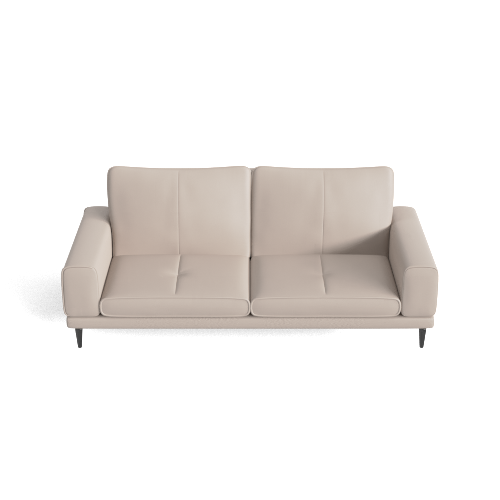

추천 아이템 Top10
추천 1순위 : 하임 1인 천연면피 소가죽소파 10colors (크림아이보리)


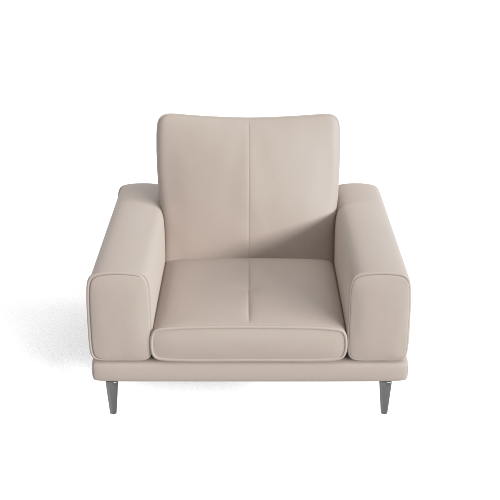

------------------------------------------------------------
추천 2순위 : 가람 애쉬 원목 선반 테이블 1500


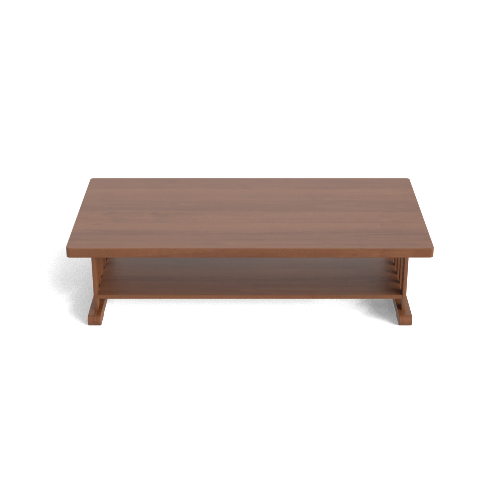

------------------------------------------------------------
추천 3순위 : 순수원목 선반장 (가로3단 500) (브라운)


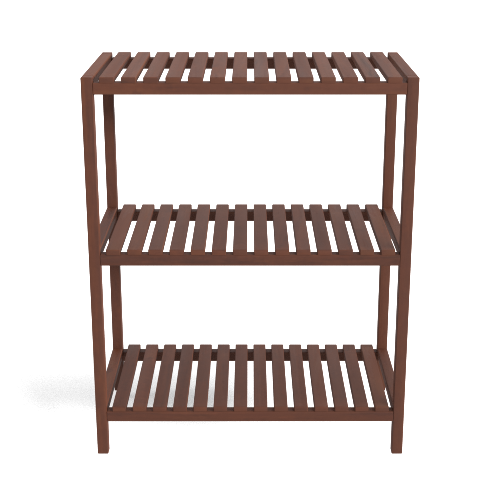

------------------------------------------------------------
추천 4순위 : 피치 도비 쉬폰 커튼 고리&레일형 (100*130cm)


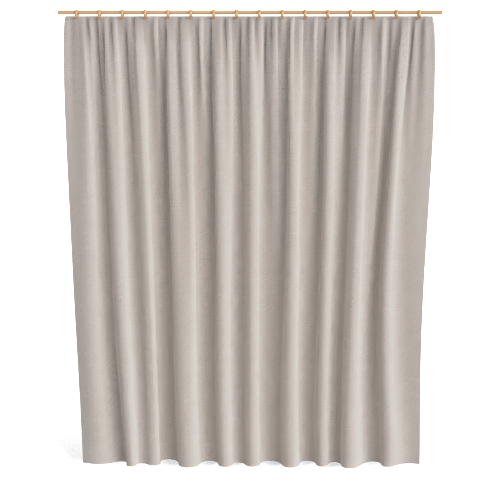

------------------------------------------------------------
추천 5순위 : 세이브 M2 알러지케어 차렵이불(SS 이불베개세트) 8colors (블루그레이)


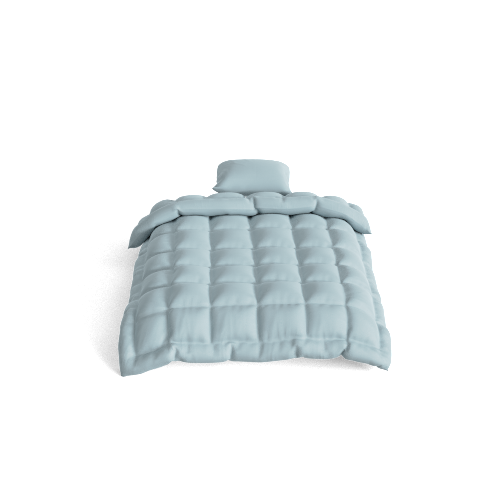

------------------------------------------------------------
추천 6순위 : 아마르 원목 의자 (브라운+아이보리)


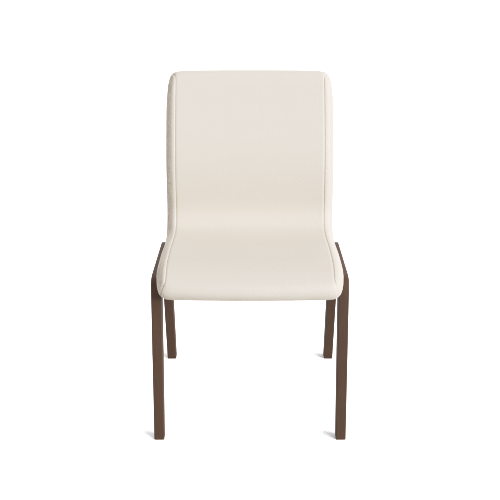

------------------------------------------------------------
추천 7순위 : 선데이 원형 러그 200 (브라운)


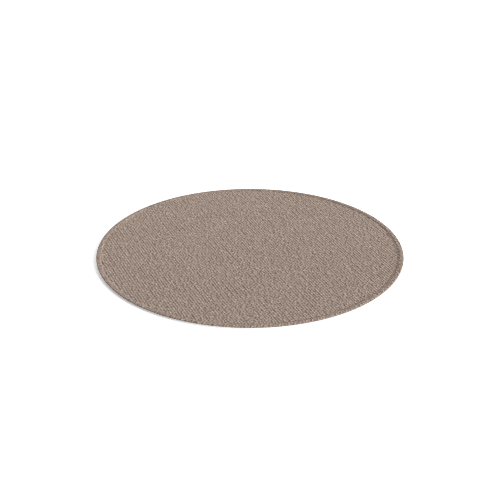

------------------------------------------------------------
추천 8순위 : 솝 밀크 미니책꽂이 (화이트)


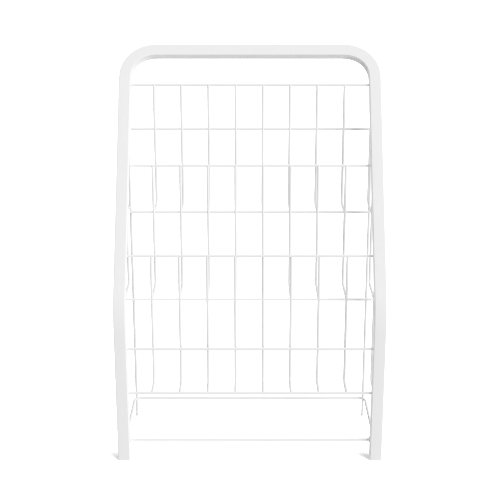

------------------------------------------------------------
추천 9순위 : LEITER 선반 4단 (600) (레드)


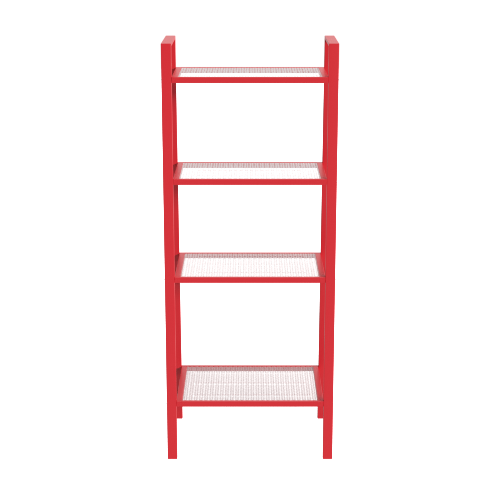

------------------------------------------------------------
추천 10순위 : 폴로 체어 (라이트 그린)


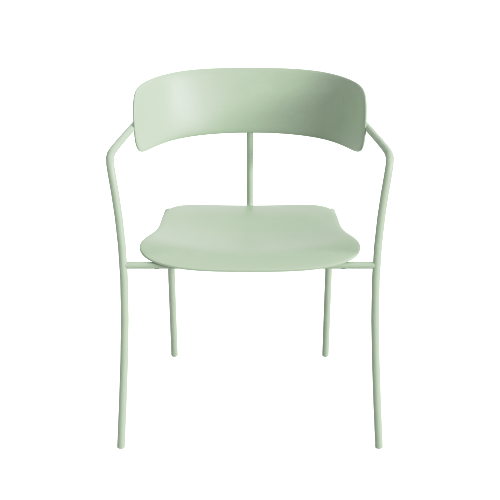

------------------------------------------------------------


In [8]:
samp_item_list = ['베니 4인 카우치형 천연면피 소가죽소파 (좌형) (미스티블루)',
                  '클래식 욕실 방수시계 (베이지)',
                  '원목 토끼 원형테이블 (내추럴)',
                  '델타듀얼 리프트업 소파테이블 2colors (1200X725) (오프라인 전용상품) (어번모카)',
                  '번드 우디 화이트 라탄 높은 거실장(2000) (크림화이트)',
                  '하임 1인 천연면피 소가죽소파 10colors (크림아이보리)',
                  '하임 3인 천연면피 소가죽소파 10colors (크림아이보리)',
                  '디오마레 4인 기능성 카시미라 패브릭 소파(스툴O) (인디고블루)', 
                  'DK010 3.5인/3인용 풀커버 패브릭 발수 소파 라이트그레이']

prod = samp_item_list[6]

rec_report_df = run_search(ent_id=1, prod_name=prod)

In [9]:
rec_report_df.style.applymap(lambda x: 'background-color: yellow', subset=['사용자가 선택한 상품', '추천된 아이템'])

,사용자가 선택한 상품 ID,사용자가 선택한 상품,사용자가 선택한 상품이 해당한 Project Id,추천된 아이템,추천된 아이템 ID,추천된 아이템이 해당한 Project Id,사용자가 선택한 아이템-추천된 아이템 유사도
0,XjDwfUM3638F4D338FF415F,하임 3인 천연면피 소가죽소파 10colors (크림아이보리),"['XtpWJZiE1313C62DE374255', 'XrRKiWT41145C5ECA774283', 'XtzO7w_92BED9CA5F2447B8', 'XrSnMYuE774C7C101C84D11', 'XtO_Sp9FA378CACA0314BE3', 'X5eWe4v078A4FACEDD24D34']","['하임 1인 천연면피 소가죽소파 10colors (크림아이보리)', '가람 애쉬 원목 선반 테이블 1500', '순수원목 선반장 (가로3단 500) (브라운)', '피치 도비 쉬폰 커튼 고리&레일형 (100*130cm)', '세이브 M2 알러지케어 차렵이불(SS 이불베개세트) 8colors (블루그레이)', '아마르 원목 의자 (브라운+아이보리)', '선데이 원형 러그 200 (브라운)', '솝 밀크 미니책꽂이 (화이트)', 'LEITER 선반 4단 (600) (레드)', '폴로 체어 (라이트 그린)']","['XjDwfUO514935205E2144AD', 'XZz5qJW855558092C4147BA', 'XxzI_YKA15B6BA7F54940AB', 'X1-TGzo1DE6B8ED39D14CC6', 'Xe0WykHEDC4B3C853E44FBC', 'XgAC0r9C88E9A83B2E14BA0', 'X1-TGzM5230D1B3C9174DAA', 'XZFQ4C1A68DD3AF648749D3', 'Xs_Qb6x5E3902F6416144DD', 'XvJwdIG32441A7B434348E2']","[['XrRKiWT41145C5ECA774283'], ['XuWTPie1F9498D15B3144C4', 'XrRKiWT41145C5ECA774283', 'Xv3U5NY0097191FB16746A5', 'XrSnMYuE774C7C101C84D11', 'Xu7v7IjAA257893B066426E'], ['X8l3PVwAE3FDA3419D145D9'], ['X8f8_Se660E6CEE0AB548CA'], ['X9JZx2XEA953510722C402A', 'X800JzX773ABDDC4E444AB6'], ['X2XzLnL62BDEDE595864127'], ['X8rpPsYB30DC9611BC742C7', 'X9NgRrpD7B234E989B44C98', 'X9VTyFo693B243163214D3D'], ['X0H4_5d6BF1A57C70574B3A', 'X0fPaMbC022204B30E54B64'], ['X9pluQeD2B2DE0EBDE145A9'], ['X8atLhx9F21B00E0DE44CFE', 'X8rpPsYB30DC9611BC742C7', 'X8Y_BSR82244D2D845846B1', 'X7OitFL241EFCDD67D04696']]","[0.7555555555555555, 0.7083333333333334, 0.4390243902439024, 0.4390243902439024, 0.4285714285714286, 0.4285714285714286, 0.4186046511627908, 0.4186046511627908, 0.41025641025641024, 0.40909090909090917]"


In [10]:
def check_project_ids(x):
    for id_ in x:
        if id_ in search_engine.project_id:
            return 1
    return 0

result = search_engine.result
result['project_relationship'] = result['project_ids'].apply(check_project_ids)

print(f'+++[{prod}]에 대한추천된 아이템 세부정보+++\n')
slice_ = ['project_relationship']
result.style.highlight_max(color = 'lightgreen', axis = 0, subset=slice_)

+++[하임 3인 천연면피 소가죽소파 10colors (크림아이보리)]에 대한추천된 아이템 세부정보+++



,index,product_id,name,new_tag,projectId,project_ids,images,category,cat_names,similarity,project_relationship
0,338,XkczKZr8E2428D00B0D4801,Vanilla Spring no.05,MODERN MODERN MODERN MODERN MODERN MODERN MODERN MODERN MODERN X6eMi9vBF9F09546EFE415A X6eMi9vBF9F09546EFE415A X6eMi9vBF9F09546EFE415A X6eMi9vBF9F09546EFE415A X6eMi9vBF9F09546EFE415A X6eMi9vBF9F09546EFE415A X6eMi9vBF9F09546EFE415A X6eMi9vBF9F09546EFE415A X9eHrRjE32DBAD155CA45A2 X6eMi9vBF9F09546EFE415A X4vj6OHF1F0F6E1AB6F4B03 Xz5-iwjB6D841F5C1934A1F X0x8fpf29143AC3D0FC4B9D,X6eMi9vBF9F09546EFE415A,"['X9eHrRjE32DBAD155CA45A2', 'X6eMi9vBF9F09546EFE415A', 'X4vj6OHF1F0F6E1AB6F4B03', 'Xz5-iwjB6D841F5C1934A1F', 'X0x8fpf29143AC3D0FC4B9D']","['https://resources.archisketch.com/product/XkczKZr8E2428D00B0D4801/09-06-2021_17-28-05/preview/XkczKZr8E2428D00B0D4801_1.png', 'https://resources.archisketch.com/product/XkczKZr8E2428D00B0D4801/09-06-2021_17-28-05/preview/XkczKZr8E2428D00B0D4801_0.png', 'https://resources.archisketch.com/product/XkczKZr8E2428D00B0D4801/09-06-2021_17-28-05/preview/XkczKZr8E2428D00B0D4801_2.png', 'https://resources.archisketch.com/product/XkczKZr8E2428D00B0D4801/09-06-2021_17-28-05/preview/XkczKZr8E2428D00B0D4801_3.png', 'https://resources.archisketch.com/product/XkczKZr8E2428D00B0D4801/09-06-2021_17-28-05/preview/XkczKZr8E2428D00B0D4801_4.png', 'https://resources.archisketch.com/product/XkczKZr8E2428D00B0D4801/09-06-2021_17-28-05/preview/XkczKZr8E2428D00B0D4801_5.png']",홈데코,홈갤러리,0.553846,1
1,340,XvJwdJi2D7859C2C34F40B6,모듈 가구 1x2 사이드테이블 (네이비),MODERN MODERN MODERN MODERN MODERN MODERN MODERN MODERN MODERN X6eMi9vBF9F09546EFE415A X6eMi9vBF9F09546EFE415A X6eMi9vBF9F09546EFE415A X6eMi9vBF9F09546EFE415A X6eMi9vBF9F09546EFE415A X6eMi9vBF9F09546EFE415A X6eMi9vBF9F09546EFE415A X6eMi9vBF9F09546EFE415A X9VYwJu05709020A690490F X6eMi9vBF9F09546EFE415A X3WdqrXEDD839BAD6DE4AD6 X4vj6OHF1F0F6E1AB6F4B03 X3im-sBF6874A5D72A448F7,X6eMi9vBF9F09546EFE415A,"['X9VYwJu05709020A690490F', 'X6eMi9vBF9F09546EFE415A', 'X3WdqrXEDD839BAD6DE4AD6', 'X4vj6OHF1F0F6E1AB6F4B03', 'X3im-sBF6874A5D72A448F7']","['https://resources.archisketch.com/product/XvJwdJi2D7859C2C34F40B6/27-09-2021_04-39-46/preview/XvJwdJi2D7859C2C34F40B6_1.png', 'https://resources.archisketch.com/product/XvJwdJi2D7859C2C34F40B6/27-09-2021_04-39-46/preview/XvJwdJi2D7859C2C34F40B6_0.png', 'https://resources.archisketch.com/product/XvJwdJi2D7859C2C34F40B6/27-09-2021_04-39-46/preview/XvJwdJi2D7859C2C34F40B6_2.png', 'https://resources.archisketch.com/product/XvJwdJi2D7859C2C34F40B6/27-09-2021_04-39-46/preview/XvJwdJi2D7859C2C34F40B6_3.png', 'https://resources.archisketch.com/product/XvJwdJi2D7859C2C34F40B6/27-09-2021_04-39-46/preview/XvJwdJi2D7859C2C34F40B6_4.png', 'https://resources.archisketch.com/product/XvJwdJi2D7859C2C34F40B6/27-09-2021_04-39-46/preview/XvJwdJi2D7859C2C34F40B6_5.png']",책상/테이블,협탁/사이드테이블,0.553846,1
2,337,X1-TGzG01A2AD4AE9F04C6B,모던 하프문 프렌치 인테리어 러그 카페트 150x200cm(중형),MODERN MODERN MODERN MODERN MODERN MODERN MODERN MODERN MODERN X6eMi9vBF9F09546EFE415A X6eMi9vBF9F09546EFE415A X6eMi9vBF9F09546EFE415A X6eMi9vBF9F09546EFE415A X6eMi9vBF9F09546EFE415A X6eMi9vBF9F09546EFE415A X6eMi9vBF9F09546EFE415A X6eMi9vBF9F09546EFE415A X8nM_Ay36F84B892AE24868 X8FetN24B61464AD2AB4CE9 X6eMi9vBF9F09546EFE415A X5MXUgB00190DADD36D47C4 X848W83FEE91DC8C0674142 X8jKRgF3097B19658EC4AB3,X6eMi9vBF9F09546EFE415A,"['X8nM_Ay36F84B892AE24868', 'X8FetN24B61464AD2AB4CE9', 'X6eMi9vBF9F09546EFE415A', 'X5MXUgB00190DADD36D47C4', 'X848W83FEE91DC8C0674142', 'X8jKRgF3097B19658EC4AB3']","['https://resources.archisketch.com/product/X1-TGzG01A2AD4AE9F04C6B/03-12-2021_11-12-20/preview/X1-TGzG01A2AD4AE9F04C6B_1.png', 'https://resources.archisketch.com/product/X1-TGzG01A2AD4AE9F04C6B/03-12-2021_11-12-20/preview/X1-TGzG01A2AD4AE9F04C6B_0.png', 'https://resources.archisketch.com/product/X1-TGzG01A2AD4AE9F04C6B/03-12-2021_11-12-20/preview/X1-TGzG01A2AD4AE9F04C6B_2.png', 'https://resources.archisketch.com/product/X1-TGzG01A2AD4AE9F04C6B/03-12-2021_11-12-20/preview/